<a href="https://colab.research.google.com/github/manveethjain8/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv(r"Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
X = df.drop('csMPa', axis=1)
y = df['csMPa']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model intercept: {model.intercept_}")
print(f"Model coefficients: {model.coef_}")
print(f"Train MSE: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, model.predict(X_train))}")

Model intercept: -28.82355499969256
Model coefficients: [ 0.11899393  0.1085356   0.08215181 -0.13527626  0.31056994  0.01786715
  0.02409978  0.11643864]
Train MSE: 110.64488699516545
Train R2: 0.6105238047649741


In [18]:
y_pred = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 95.9709400911068
Test R2: 0.627553179231485


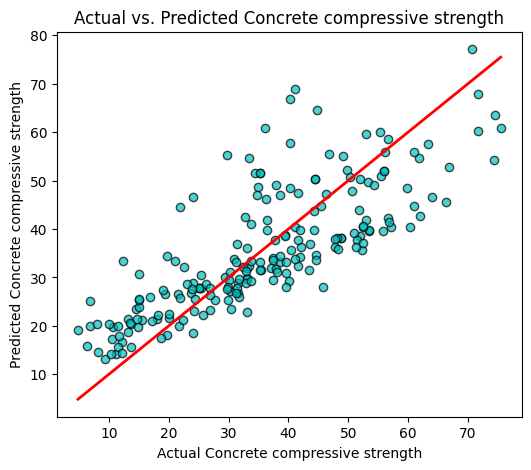

In [20]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual Concrete compressive strength')
plt.ylabel('Predicted Concrete compressive strength')
plt.title('Actual vs. Predicted Concrete compressive strength')
plt.show()

Polynomial Features

In [71]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
    ('regressor', LinearRegression())
])

In [72]:
pipeline.fit(X_train, y_train)
print(f"Train MSE: {mean_squared_error(y_train, pipeline.predict(X_train))}")
print(f"Train R2: {r2_score(y_train, pipeline.predict(X_train))}")

Train MSE: 53.1021754902378
Train R2: 0.8130773700411105


In [73]:
y_pred = pipeline.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Test R2: {r2_score(y_test, y_pred)}")

Test MSE: 55.582457880845894
Test R2: 0.7842939778586241


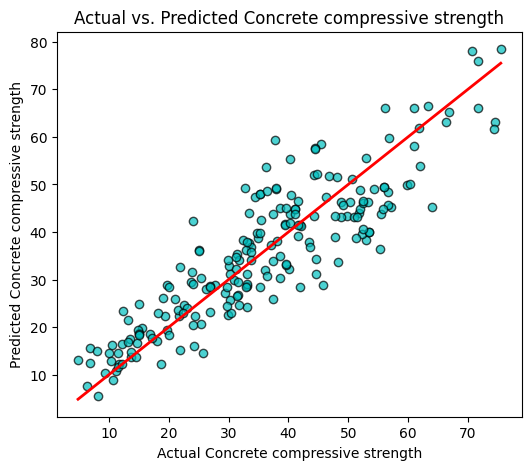

In [67]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw=2, c='r')
plt.xlabel('Actual Concrete compressive strength')
plt.ylabel('Predicted Concrete compressive strength')
plt.title('Actual vs. Predicted Concrete compressive strength')
plt.show()

Energy Prediction

In [74]:
df = pd.read_csv(r"train_energy_data.csv")
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [77]:
X = df.drop(columns=['Energy Consumption'])
y = df['Energy Consumption']

In [78]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [103]:
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        # ('num', 'passthrough', numerical_features)
        ('num', StandardScaler(), numerical_features)
    ])),
    # ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
    ('regressor', LinearRegression())
])

In [104]:
pipeline.fit(X, y)
print(f"Train MSE: {mean_squared_error(y, pipeline.predict(X))}")
print(f"Train R2: {r2_score(y, pipeline.predict(X))}")


Train MSE: 0.00018152838506188142
Train R2: 0.9999999997354678


In [105]:
df_test = pd.read_csv(r"test_energy_data.csv")
df_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [106]:
X = df_test.drop(columns=['Energy Consumption'])
y = df_test['Energy Consumption']

In [107]:
y_pred = pipeline.predict(X)
print(f"Test MSE: {mean_squared_error(y, y_pred)}")
print(f"Test R2: {r2_score(y, y_pred)}")

Test MSE: 0.00018152838506188142
Test R2: 0.9999999997354678


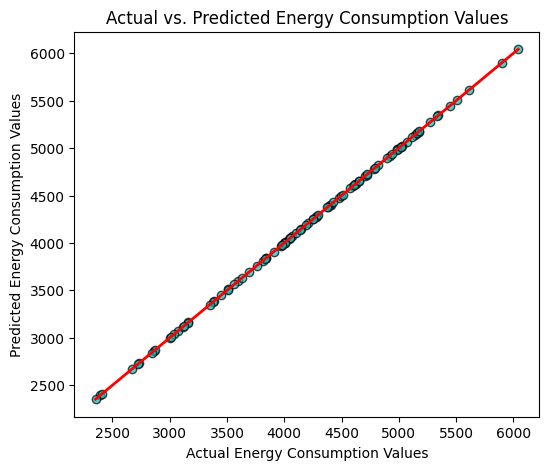

In [108]:
plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, c='c', edgecolors='black', alpha=0.7)
plt.plot((y.min(), y.max()), (y.min(), y.max()), lw=2, c='r')
plt.xlabel('Actual Energy Consumption Values')
plt.ylabel('Predicted Energy Consumption Values')
plt.title('Actual vs. Predicted Energy Consumption Values')
plt.show()